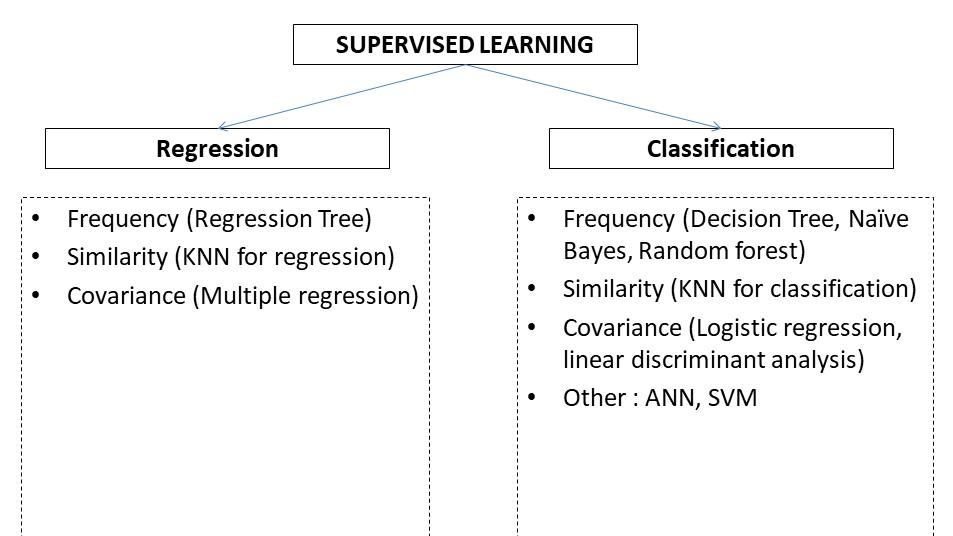

#Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/LatifahNursyabanu/datascienceuinjkt/e6fdddc6f6e000db52822a14b02142b71a301a81/DATA/IRIS.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Exploratory Data Analysis
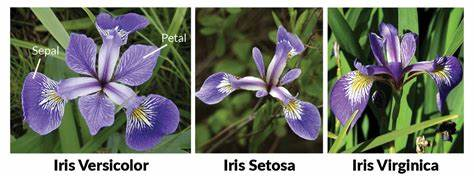

IRIS DATASET : https://www.kaggle.com/datasets/arshid/iris-flower-dataset

Iris-flower-dataset adalah data multivariate. Data berisi 50 sample dari setiap spesies ('setosa', 'versicolor', 'virginica'). 

Terdapat 4 fitur dari setiap fitur, yaitu : 'sepal-length', 'sepal-width', 'petals-length', and 'petals width' dalam sentimeter

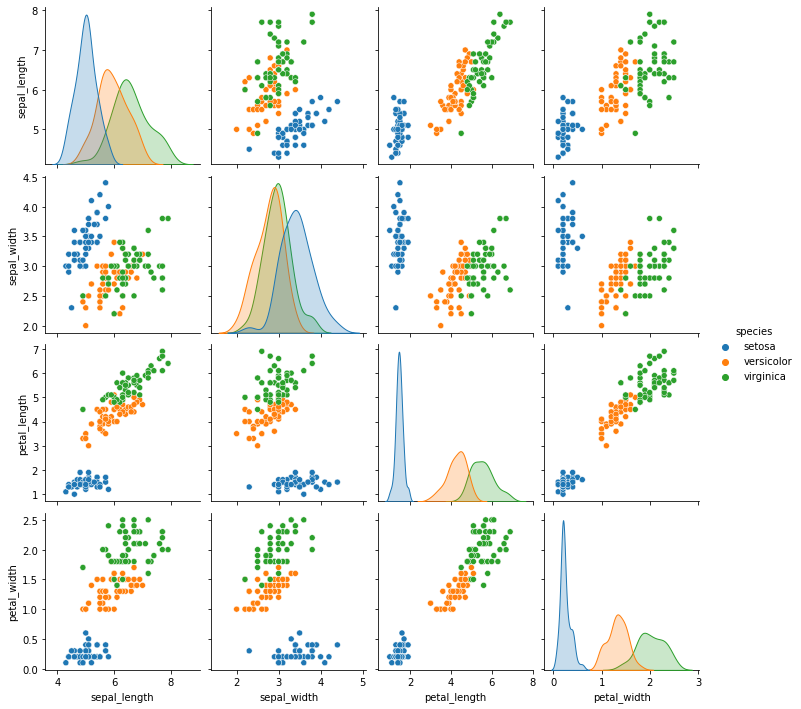

In [5]:
# load kembali iris data
df = sns.load_dataset("iris")
g = sns.pairplot(df, hue="species")

In [6]:
df.describe() # (include ='all').T

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#Logistic Regression


*   Bernilai 0 atau 1
*   Digunakan untuk binary classification.
*   variasi dari linear regression yang kemudian dibawa ke kasus categorical.
*   Dasar perhitungan menggunakan perkalian matriks sehingga komputasi cepat namun tidak bisa meng-handle missing value.
*   Menjadi fungsi aktivasi 'sigmoid' dalam Neural Network.


In [9]:
#ubah ke binary classification
df_binary = df[df["species"].isin(['setosa','versicolor']) ]
set(df_binary['species'].values)

{'setosa', 'versicolor'}

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_binary[['sepal_length', 'sepal_width','petal_length','petal_width']], 
                                                    df_binary['species'], test_size=0.5)
print(X_train.shape, X_test.shape)

(50, 4) (50, 4)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression().fit(X_train, y_train)
prediction = model.predict(X_test)

print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

1.0
[[27  0]
 [ 0 23]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        27
  versicolor       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#Naive Bayes


*   Dasar perhitungannya berupa peluang bersyarat sehingga mudah diimplementasikan dan cocok untuk permasalahan multiclass
*   Salah satu variasi Naive-Bayes adalah Gaussian (distribusi normal)
*   Menjadi fungsi aktivasi 'softmax' dalam Neural Network

In [12]:
# Separate Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df[['species']]
seed = 99
validation_size = 0.3
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(x_train.shape, x_test.shape, len(y_test))

(105, 4) (45, 4) 45


In [13]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB().fit(x_train, y_train)
prediction = gauss.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Akurasi =  0.9555555555555556
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#KNN
melihat seberapa dekat 'tetangga' berdasarkan distance/similarity

mudah diimplementasikan dan dimodifikasi serta dapat menangani data multiclass

namun cukup sulit menemukan rumus jarak yang tepat (euclidean, manhattan, chebisev, dll)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

KNN = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
KNN.fit(x_train,y_train)
prediction = KNN.predict(x_test)

print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.9333333333333333
[[12  0  0]
 [ 0 16  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.89      0.91        18
   virginica       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#Decision Tree
Biasa digunakan di bank atau tim marketing karena mudah dalam melakukan profiling nasabah
namun jarang digunakan dalam teknologi mesin karena akurasi yang kurang dibandingkan algoritma machine learning lainnya

[Decision Tree](http://scikit-learn.org/stable/modules/tree.html)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
prediction = decision_tree.predict(x_test)

print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.9555555555555556
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#Random Forest

[Random forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
prediction = random_forest.predict(x_test)

print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.9555555555555556
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature ranking:
1. feature 3 (0.457454)
2. feature 2 (0.427519)
3. feature 0 (0.098743)
4. feature 1 (0.016285)


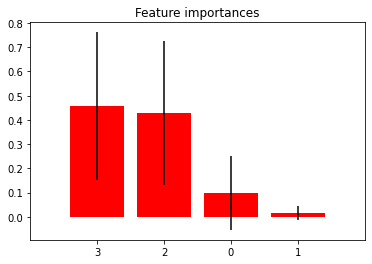

In [17]:
# Varible importance
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#SVM


[Support Vector Machine](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)


In [22]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(x_train,y_train)
prediction = SVM.predict(x_test)

print('Accuracy : ', accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy :  0.9333333333333333
[[12  0  0]
 [ 0 16  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.89      0.91        18
   virginica       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model dapat dimodifikasi dengan menggunakan kernel, melakukan optimisasi, menambah parameter

#Visualization

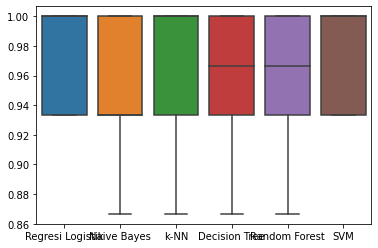

In [27]:
# Model Comparisons using Cross Validation
from sklearn.model_selection import cross_val_score

df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']

Models = [('Regresi Logistik',model), ('Naive Bayes',gauss), ('k-NN',KNN), 
          ('Decision Tree', decision_tree), ('Random Forest', random_forest), ('SVM', SVM)]
Scores = {}
for model_name, model in Models:
    if model_name=='Naive Bayes':
        Scores[model_name] = cross_val_score(model, X.values, Y, cv=10, scoring='accuracy')
    else:
        Scores[model_name] = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
        
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)